<a href="https://colab.research.google.com/github/Hitesh123mori/Gold-Price-Prediction---MachineLearning/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from datetime import datetime

### **Data Collection and Processing**

In [ ]:
df = pd.read_csv("gld_price_data.csv")

In [ ]:
df.shape

(2290, 6)

In [ ]:
df.isnull().mean()*100

Date       0.0
SPX        0.0
GLD        0.0
USO        0.0
SLV        0.0
EUR/USD    0.0
dtype: float64

In [ ]:
df.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [ ]:
df.sample(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
169,11/4/2008,1005.750000,75.480003,57.380001,10.120000,1.298398
1985,1/3/2017,2257.830078,110.470001,11.440000,15.440000,1.046003
1181,5/14/2013,1650.339966,137.809998,33.560001,22.570000,1.293711
850,11/22/2011,1188.040039,165.309998,37.820000,31.889999,1.348436
338,7/30/2009,986.750000,91.620003,35.490002,13.250000,1.426005


In [ ]:
df.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
df.tail(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


### **Top 5 highest Gold Price in Entire Dataset**

In [ ]:
df_sorted = df.sort_values(by='GLD',ascending=False)
top_5_price = df_sorted.head(5)
print(top_5_price)

          Date          SPX         GLD        USO        SLV   EUR/USD
795  8/22/2011  1123.819946  184.589996  32.720001  42.630001  1.436101
803   9/6/2011  1165.239990  182.899994  33.590000  41.049999  1.400325
805   9/8/2011  1185.900024  181.809998  34.459999  41.220001  1.390414
800  8/30/2011  1212.920044  179.100006  34.439999  40.400002  1.443314
807  9/13/2011  1172.869995  178.539993  34.849998  39.869999  1.368607


### **Top 5 highest Gold Price in Which Months Entire Dataset**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df_sorted   = df.sort_values(by = 'GLD' , ascending  = False)
top_5_price = df_sorted.head(5)

In [ ]:
 top_5_price['Month'] = top_5_price['Date'].dt.strftime('%B - %Y')

<ipython-input-14-7d1cf2e12c09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_price['Month'] = top_5_price['Date'].dt.strftime('%B - %Y')


In [ ]:
top_5_price['Month'].sample()

800    August - 2011
Name: Month, dtype: object

In [ ]:
top_5_price[['Month','GLD']]

,Month,GLD
795,August - 2011,184.589996
803,September - 2011,182.899994
805,September - 2011,181.809998
800,August - 2011,179.100006
807,September - 2011,178.539993


### **Top 5 Gold Price in which year in entire dataset**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
top_5_price = df.sort_values(by = 'GLD' , ascending = False).head(5)
top_5_price['Year'] = top_5_price['Date'].dt.strftime("%Y")

In [ ]:
top_5_price[['Year','GLD']]

,Year,GLD
795,2011,184.589996
803,2011,182.899994
805,2011,181.809998
800,2011,179.100006
807,2011,178.539993


### **5 lowest Price in Entire Dataset**

In [ ]:
df_sorted = df.sort_values(by =  'GLD' , ascending  = True)
low_5_price = df_sorted.head(5)

In [ ]:
low_5_price.sample(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
161,2008-10-22,896.780029,71.709999,54.930000,9.45,1.294498
167,2008-10-31,968.750000,71.339996,55.590000,9.58,1.270196
168,2008-11-03,966.299988,71.099998,52.490002,9.62,1.261798
175,2008-11-12,852.299988,70.000000,45.750000,9.17,1.245904
162,2008-10-23,908.109985,70.650002,56.599998,9.38,1.262993


### **5 lowest Price in Which Month in entire dataset**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df_sorted = df.sort_values(by = 'GLD' ,ascending  = True)

In [ ]:
low_5_price = df_sorted.head(5)

In [ ]:
low_5_price['Month']  = low_5_price['Date'].dt.strftime("%B - %Y")

<ipython-input-24-2c8d26bf923b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_5_price['Month']  = low_5_price['Date'].dt.strftime("%B - %Y")


In [ ]:
low_5_price[['Month','GLD']]

,Month,GLD
175,November - 2008,70.000000
162,October - 2008,70.650002
168,November - 2008,71.099998
167,October - 2008,71.339996
161,October - 2008,71.709999


### **Lowest 5 price in which year in entire dataset**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df_sorted = df.sort_values(by = 'GLD' , ascending = True)
low_5_price = df_sorted.head(5)

In [ ]:
low_5_price['Year'] = low_5_price['Date'].dt.strftime("%Y")

<ipython-input-28-5dc98282eca8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_5_price['Year'] = low_5_price['Date'].dt.strftime("%Y")


In [ ]:
low_5_price[['Year','GLD']]

,Year,GLD
175,2008,70.000000
162,2008,70.650002
168,2008,71.099998
167,2008,71.339996
161,2008,71.709999


### **Statistics Analysis**

In [ ]:
correlation  = df.corr()

<ipython-input-30-115d17c92c7c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation  = df.corr()


In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

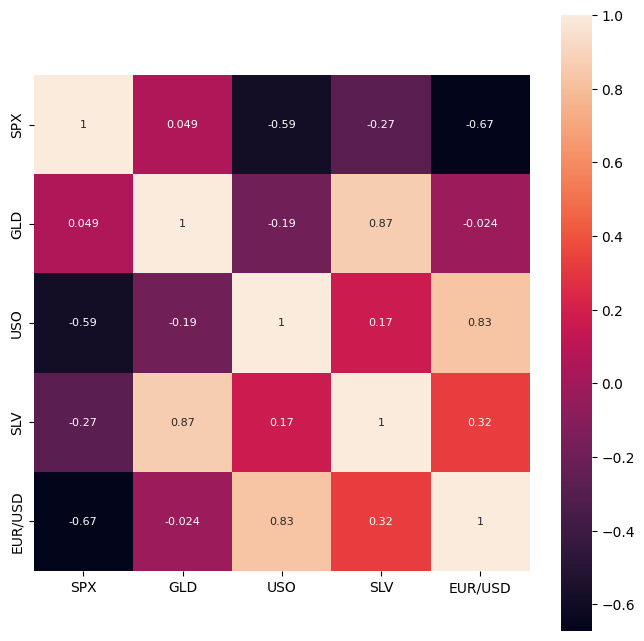

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,annot=True,annot_kws={'size':8})

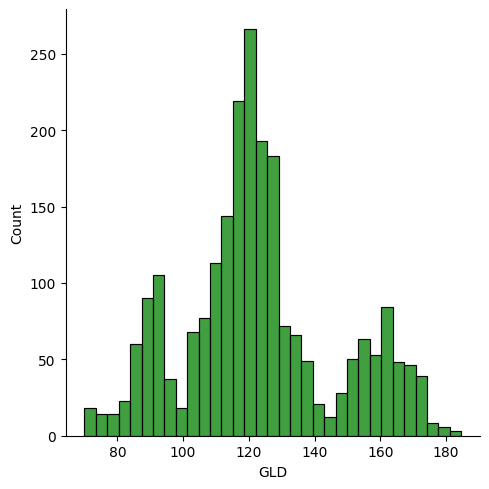

In [ ]:
sns.displot(df['GLD'],color= 'green')

<Axes: xlabel='Date', ylabel='GLD'>

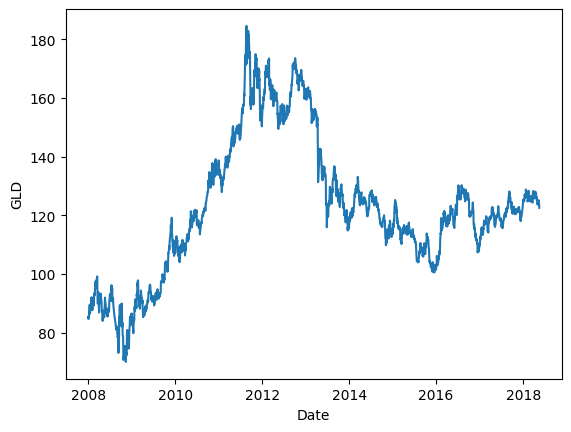

In [ ]:
sns.lineplot(x ='Date', y = 'GLD',data = df)

<Axes: xlabel='USO', ylabel='GLD'>

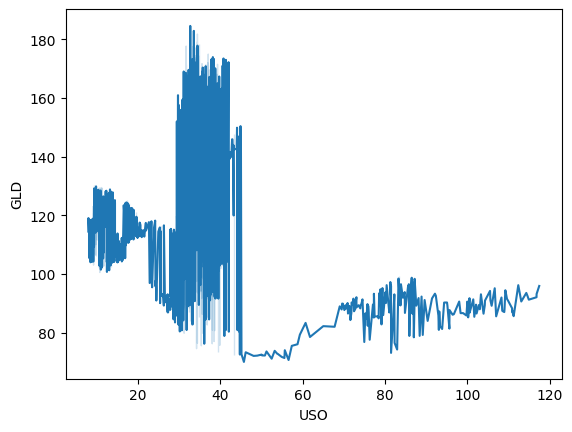

In [ ]:
sns.lineplot(x =  'USO', y = 'GLD' ,data = df)

<Axes: xlabel='SPX', ylabel='GLD'>

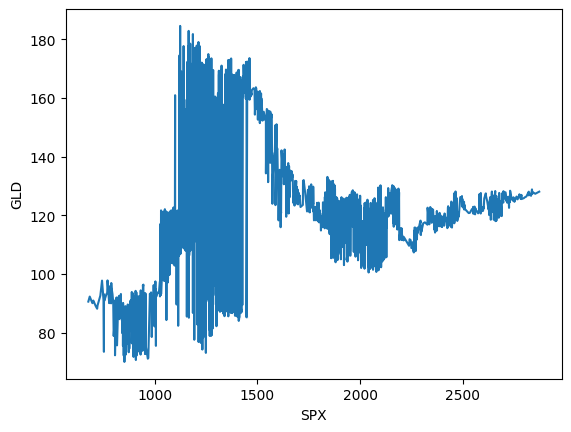

In [ ]:
sns.lineplot(x = 'SPX' , y  = 'GLD' ,data =df)

<Axes: xlabel='SLV', ylabel='GLD'>

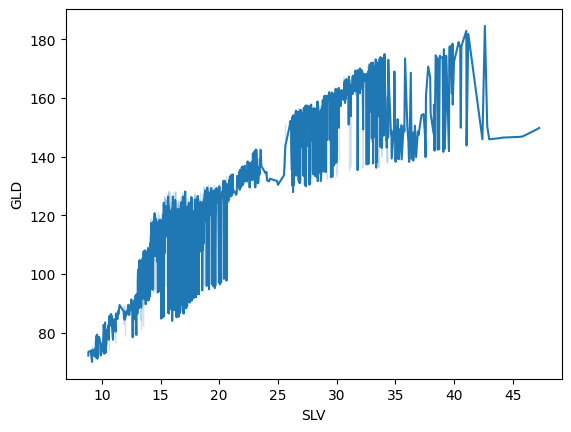

In [ ]:
sns.lineplot(x = 'SLV', y = 'GLD', data = df)

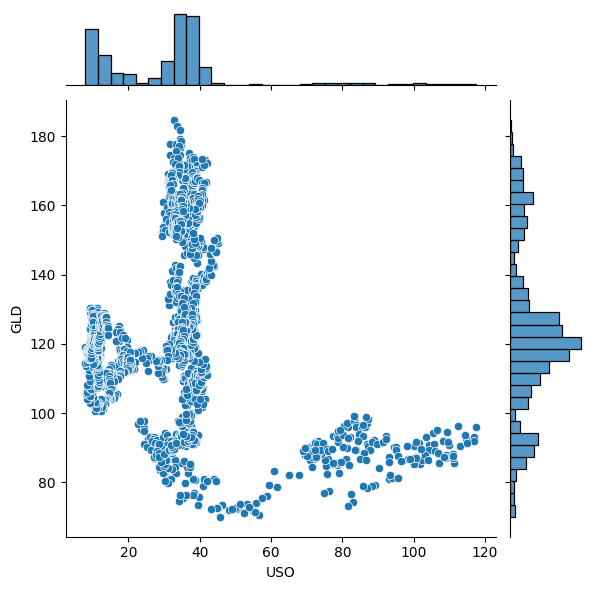

In [ ]:
sns.jointplot(x = df['USO'], y   = df['GLD'])

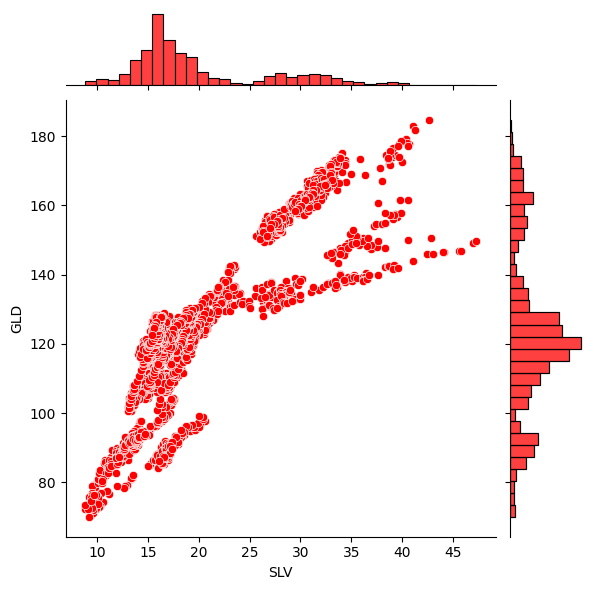

In [ ]:
sns.jointplot(x = df['SLV'] ,   y = df['GLD'],color = 'red')

### **Spliting Data**

In [ ]:
x = df.drop(['Date','GLD'],axis = 1)
y = df['GLD']

In [ ]:
x.sample(5)

,SPX,USO,SLV,EUR/USD
2246,2728.120117,12.570000,15.780000,1.233654
1964,2191.080078,11.330000,15.660000,1.059210
766,1307.410034,37.230000,34.009998,1.447890
144,1188.219971,86.129997,13.180000,1.463315
1756,2021.150024,10.660000,13.590000,1.086992


In [ ]:
y.sample(5)

46       95.870003
102      87.250000
2199    121.769997
2212    127.169998
1120    162.389999
Name: GLD, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0 )

In [ ]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((1832, 4), (458, 4), (1832,), (458,))

### Training **Model**

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(x_train,y_train)

RandomForestRegressor()

### **Prediction**

In [ ]:
y_pred = regressor.predict(x_test)
print(y_pred)

[126.98439905 116.87079957 139.51320125 121.52800045  94.2702007
 155.07990089 117.60840112 113.22920129 153.52929969 105.67670108
 103.08439924 120.36260055  92.17219926 158.02540091 121.49439855
 117.62500056  86.71819862  92.0405993   92.96219956 125.4194998
  83.2241995  117.59769936 126.34819848 173.14239739 169.13959699
 139.28090276 114.38019935 160.07710102 133.68330101 115.82110032
 111.12350099 104.86090207 128.18780028 122.09909977  98.92829951
 120.1209      84.03400013 114.93959987 127.52429889 140.53229855
 108.11960053 131.50060084 108.33439976 135.91510068 133.49379886
 148.75109899 119.63360046 156.7565     157.31480116 127.58480005
 123.81710044 114.79609883 123.70900092 118.94510001 153.83919962
 121.51939915 112.34800054  86.88239994 155.48059957 117.83810095
  88.10099955 114.68399987  83.32659938 146.69539793 125.28670013
 127.58929821 125.14239979 120.83949973 168.29530139 121.7503988
 125.51810157 173.0015981  121.49570123 169.86130201 119.11270048
 127.28439919

### **Checking Model Preciction Accuracy**

In [ ]:
error_score  = metrics.r2_score(y_test,y_pred)
print(f"R Squared Error : {error_score}")

# error_score high means more accurate

R Squared Error : 0.9895599393434156


In [ ]:
y_test1 = list(y_test)

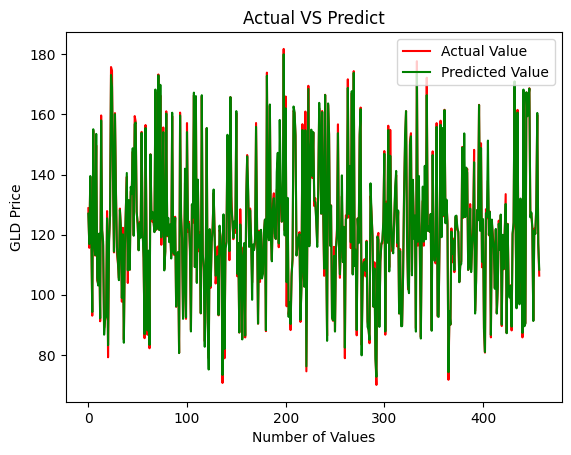

In [ ]:
plt.plot(y_test1,color = 'red',label = "Actual Value")
plt.plot(y_pred,color = 'green',label = "Predicted Value")
plt.title("Actual VS Predict")
plt.xlabel("Number of Values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()